In [1]:
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- Defining Problem (Tentukan Masalah yang Ingin Anda Pecahkan) (5 point)
- Defining Project Goals (Tentukan Tujuan dari Project Anda) (5 point)
- Describe Data - Termasuk Handling Missing Value (5 point)
- Handling Outiers / Imbalance data (5 point)
- Data Analysis (Gunakan salah satu atau beberapa pandas methods crosstab, pivot table, group by ) (10 point)
- Data Visualization (Plot yang harus ada adalah histogram dan boxplot selain yang memang anda butuhkan) (10 point)
- Insight Data setiap data analysis dan data visualization yang dilakukan (5 point)
- Data Preprocessing (Lakukan Proprocessing Data sesuai kebutuhan) (10 point)
- Feature Engineering & Feature Selection (10 point)
- Lakukan Training Model Machine Learning Minimal 3 Algoritma yang berbeda (5 point)
- Lakukan Hyper Parameter Tuning untuk ketiga algoritma yang anda pilih (5 point)
- Lakukan Evaluation Metrics dengan ketentuan : (10 Point)
- Untuk Classification case :
- Gunakan Confusion Metrics atau Classification Report
- Jelaskan Maksud dari hasil evaluation metrics (Confusion Matrix & Classification Report )tersebut
- Tentukan jenis evaluation metrics yang akan anda fokuskan dan jelaskan alasannya
- Lakukan Perbandingan seluruh model yg digunakan, dan pilih yg terbaik, Kemudian Export Model (5 point)
- Buat Kesimpulan dan Saran untuk Perusahaan sesuai dengan Problem, Goals, EDA dan Model yang telah anda buat (10 point)

# Problem
- Heart disease is the leading cause of death and remains the number one cause of death in united states

- based on this source : https://www.healthline.com/health/leading-causes-of-death#heart-disease
- heart disease have 635,260 numbers of deaths per year with 23,1 percent
- more common among: 
    - men
    - people who smoke
    - people who are overweight
    - people with a famility history of heart disease or heart attack
    - people over age 55

# Goals
- somehow we want to look at the heart disease data and get some conclusion about which feature or variable is most related to heart disease. we want to see if we can accurately predict heart disease from the datasets
- **dataset** source : https://github.com/Lecturer-Jcds/Machine-Learning-Exam/blob/master/heart.csv

# Describe
- based on the data the maximum age of the victim of the heart disease is 77 years old
- based on the internet source its doesn't matter if thalasemia is zero
- chol columns has the 564 value of the maximum which is pretty far from mean and median, i have search from the internet say that "500 mg/dL and above	Above 5.6 mmol/L	Very high"

In [11]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- there is no missing value in it

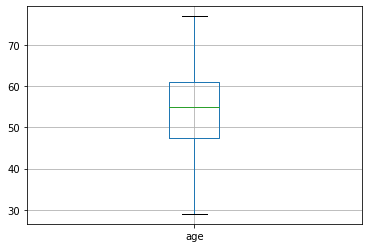

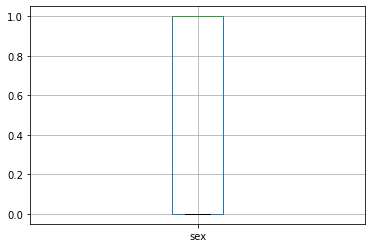

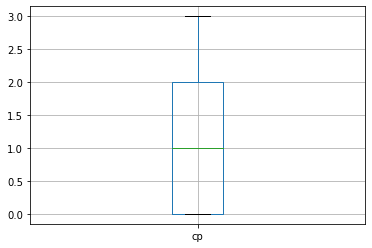

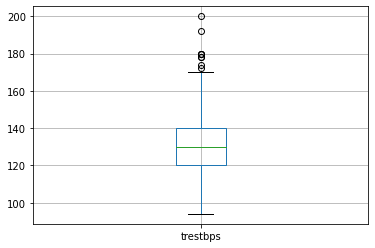

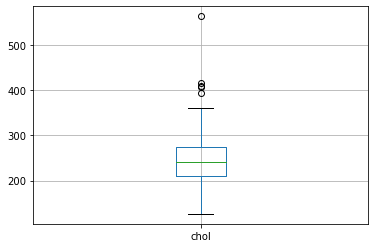

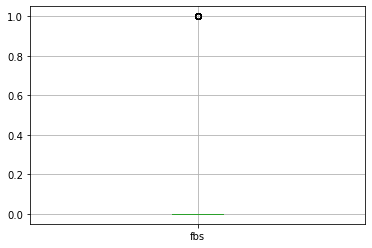

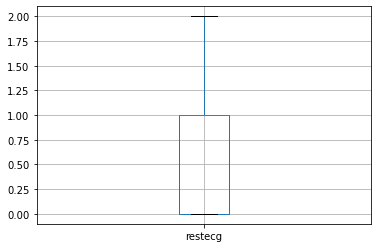

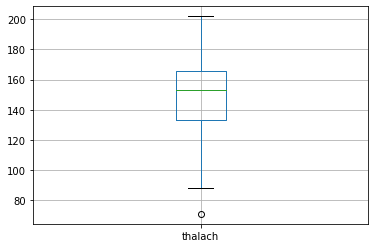

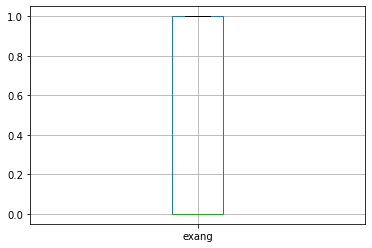

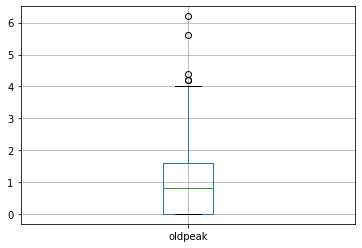

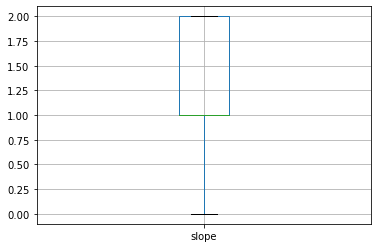

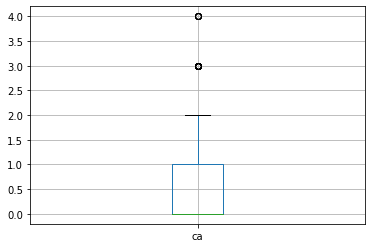

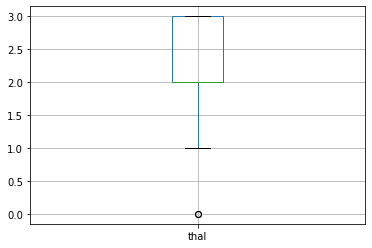

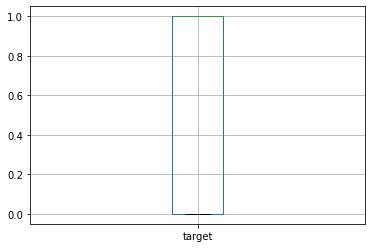

In [6]:
for column in df:
    plt.figure()
    df.boxplot([column])
plt.show()

# Outliers
- **on the trestbps** the outliers is make sense, based on the internet if people have a high blood preassure it may case a heart disease
- the outliers on the ** columns chol** is correct based on the link https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/diagnosis-treatment/drc-20350806

In [7]:
df.shape

(303, 14)

# visual

## age

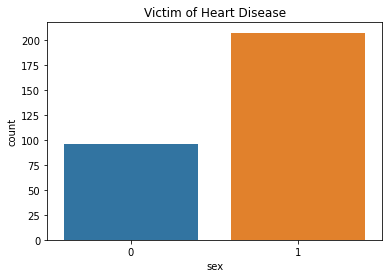

In [9]:
sns.countplot(df['sex'])
plt.title('Victim of Heart Disease')

plt.show()

- based on the internet its correct that, most heart disease victim are men

## age

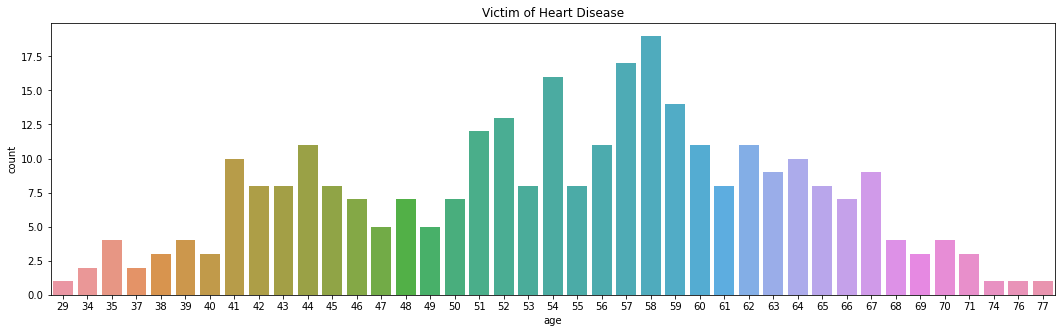

In [13]:
plt.figure(figsize=(18,5))
sns.countplot(df['age'])
plt.title('Victim of Heart Disease')

plt.show()

Text(0.5, 1.0, 'Distribution of age')

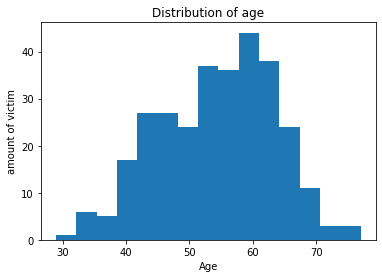

In [14]:
df.age.hist(bins=15,grid=False)
plt.xlabel('Age')
plt.ylabel('amount of victim')
plt.title('Distribution of age')

- the bar chart above say that the most highest victim of heart disease when people reach 55 or above 55 years old

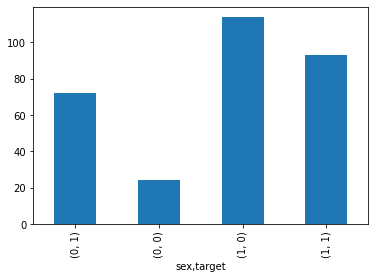

In [17]:
df.groupby('sex').target.value_counts().plot.bar()

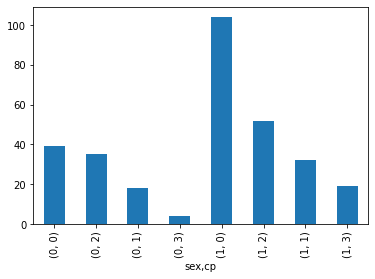

In [19]:
df.groupby('sex').cp.value_counts().plot.bar()

- the first bar chart shows us that men is highly can be victim of this disease
- the second bar chart men have complicated chestpain

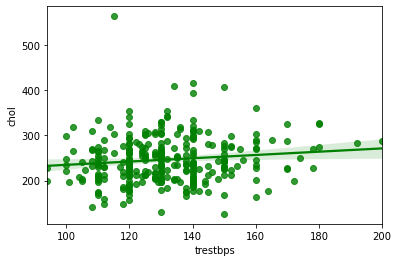

In [21]:
ax = sns.regplot(x='trestbps', y='chol',data=df, color="g")

In [22]:
(pd.crosstab(index=df['target'],columns='count',normalize=True)*100)

col_0,count
target,
0,45.544554
1,54.455446


- imbalance =>80% above
- this is balance

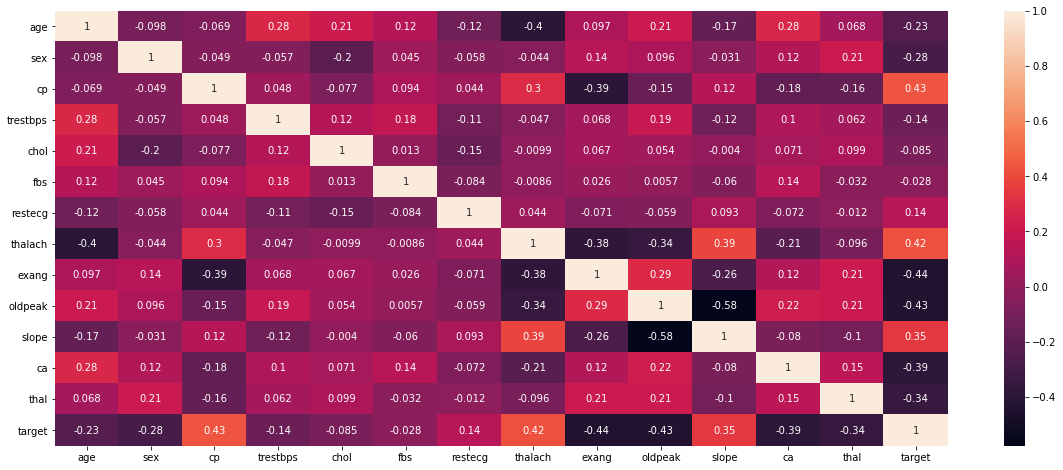

In [23]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

- the highest correlation is thalasemia columns